# Analysis of Shark Attacks on the Oregon Coast

### By Warren Berg

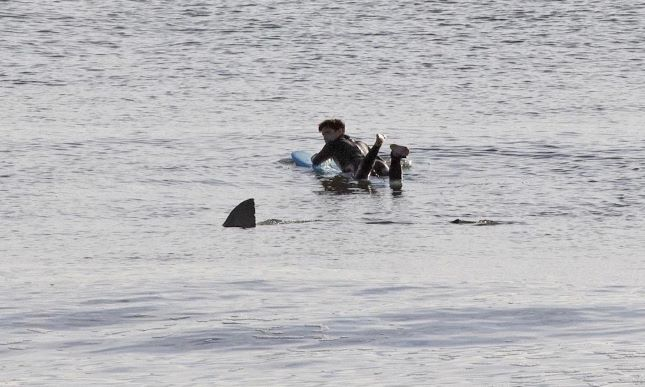

## Introduction:
The Oregon Coast is known for having sharks in the region, which poses a risk for surfers who like explore and enjoy the many great breaks from Brookings to Seaside. 

As an experienced surfer, the thought of being attacked by a shark seems like an unlikely threat that would never actually happen to *me*. In truth however, this attitude is just a display of bravado, and seriously considering the possibility of a shark attack is enough to put a shudder down any surfers spine. 

Therefore, I decided to create this project with the goal of understanding the inherent risk of being attacked by a shark on the Oregon Coast. I used historical shark attack data sourced from Globa Shark Attack File (http://www.sharkattackfile.net/). 

Hopefully, this analysis can help Oregon surfers (and myself) better understand the risks before paddling out.

## Goal of Project:
To identify potential patterns or trends in shark attacks on the Oregon Coast through data. 

In [1196]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1197]:
cd C:\Users\wberg\OneDrive\Documents\Data Projects

C:\Users\wberg\OneDrive\Documents\Data Projects


In [1198]:
# import West Coast Shark Attack Data
# Sourced From: Global Shark Attack File at http://www.sharkattackfile.net/

shark_data = pd.read_excel("Shark Attack Data West Coast.xlsx")

# Preparing the Data

In [1199]:
# Filter data to include only attacks from Oregon

oregon_attacks = pd.DataFrame(shark_data[shark_data["Area"] == "Oregon"])

In [1200]:
oregon_attacks.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
9,2019.03.05.b,05-Mar-2019,2019,Unprovoked,USA,Oregon,"Cape Kiwanda, Tillamook County",Surfing,Nathan Holstedt,M,NaN,"No injury, board bitten and dented",N,08h30,NaN,"M. Michaelson, GSAF"
27,2016.10.10,10-Oct-2016,2016,Unprovoked,USA,Oregon,"Indian Beach, Ecola State Park, Clatsop County",Surfing,Joseph Tanner,M,29,Wounds to upper thigh and lower leg,N,16h00,NaN,"UP Beacon, 10/12/2016"
57,2013.11.22,22-Nov-2013,2013,Unprovoked,USA,Oregon,"Gleneden Beach, Lincoln County",Surfing,Andrew Gardiner,M,25,"No injury, board bitten",N,10h30,"White shark, 10 '",R. Collier


### Clean Data Set
Next, we'll perform some operations to clean up the data set and take care of missing data values

In [1201]:
# Cleaning up the data

# Change Names of Locations to make them Uniform
oregon_attacks.loc[[9],['Location']]='Cape Kiwanda'
oregon_attacks.loc[[27],['Location']]='Indian Beach'
oregon_attacks.loc[[57],['Location']]='Gleneden Beach'
oregon_attacks.loc[[71],['Location']]='Lincoln City'
oregon_attacks.loc[[75],['Location']]='Newport'
oregon_attacks.loc[[76],['Location']]='Seaside Cove'
oregon_attacks.loc[[113],['Location']]='Lincoln City'
oregon_attacks.loc[[114],['Location']]='Florence'
oregon_attacks.loc[[115],['Location']]='Oswald West State Park'
oregon_attacks.loc[[119],['Location']]='Tillamook Head'
oregon_attacks.loc[[129],['Location']]='Gold Beach'

oregon_attacks.loc[[161],['Location']]='Oswald West State Park'
oregon_attacks.loc[[169],['Location']]='Bastendorff Beach'
oregon_attacks.loc[[174],['Location']]='Gold Beach'
oregon_attacks.loc[[176],['Location']]='Winchester Bay'
oregon_attacks.loc[[180],['Location']]='Neskowin'
oregon_attacks.loc[[193],['Location']]='Indian Beach'
oregon_attacks.loc[[207],['Location']]='Cape Kiwanda'
oregon_attacks.loc[[212],['Location']]='Cape Kiwanda'
oregon_attacks.loc[[220],['Location']]='Winchester Bay'
oregon_attacks.loc[[223],['Location']]='Haystack Rock, Cannon Beach'

# Fix Times and Dates
oregon_attacks.loc[[113],['Time']] = '17h00'
oregon_attacks.loc[[114],['Time']] = '17h00'
oregon_attacks.loc[[242], ['Date']]= 'NA-Sep-1974'

# Fill Age
oregon_attacks.loc[[80],['Age']] = 32


# Delete missing value
oregon_attacks = oregon_attacks.drop(235)


### Find Latitude and Longitude of each city

We've successfully cleaned the data set, but we only have the names of the cities where attacks took place.
We need to find the coordinates of these cities so we can plot them on a map. We can do this using GeoPy.

In [1202]:
## finding latitude and longitude coordinates for each city

# create empty lists
latitude = []
longitude = []

# iteratively look up lat/lon for each city and append to lists above
for i in range(len(oregon_attacks)):
    
    # find city where attack took place
    city = oregon_attacks.iat[i,6] + ' oregon'
    location = geolocator.geocode(city)
    
    # translate into coordinates
    lat, lon = location.latitude, location.longitude
    
    # append each coordinate to a list for latitude and longitude values
    latitude.append(round(lat,8))
    longitude.append(round(lon,8))
    
    
# add latitude and longitude to the DataFrame    
oregon_attacks.insert(7,'Latitude', latitude, True)
oregon_attacks.insert(8,'Longitude', longitude, True)

# 1. Which Locations have Shark Attacks Taken Place?

### Determine Number of attacks in each region

We want to see which regions have a higher concentration of shark attacks.

First, we'll look at which locations have had the most reported attacks. 
We will create a DataFrame that contains each location, the coordinates, and the number of attacks. 
Then we will use this information to plot points on map of Oregon.

In [1203]:
# Shark Attack Count by Location
by_location = oregon_attacks['Location'].value_counts()

# create column of data with number of attacks in each location
num_attacks = pd.DataFrame(by_location)
num_attacks = num_attacks.rename(columns={'Location':'Number of Attacks'})

# gather list of locations and coordinates
locations = oregon_attacks.iloc[:, 6:9]
locations = locations.drop_duplicates()

# join both 
attacks_by_location = locations.join(num_attacks, on='Location', how='left')
attacks_by_location

,Location,Latitude,Longitude,Number of Attacks
9,Cape Kiwanda,45.216713,-123.980335,4
27,Indian Beach,45.928313,-123.978036,2
57,Gleneden Beach,44.878991,-124.034673,2
71,Lincoln City,44.961792,-124.015952,2
72,Seaside Cove,45.993246,-123.920213,2
75,Newport,44.636755,-124.053442,1
80,Florence,43.980009,-124.101309,2
82,Winchester Bay,43.677607,-124.173789,5
115,Oswald West State Park,45.771549,-123.958049,2
119,Tillamook Head,45.946317,-123.992797,1


In [1204]:
# Next, we'll parse each individual column from the above DataFrame so we can plot on our map

# City name
location_name = attacks_by_location.iloc[:,0]

# Latitude and Longitude
location_lat = attacks_by_location.iloc[:, 1]
location_lon = attacks_by_location.iloc[:, 2]

# Number of attacks in each city
number_of_attacks = attacks_by_location.iloc[:,3]

### Plot Shark Attacks on Map

We can plot our map using the Matplotlib Basemap Toolkit. This is a useful tool as it allows us to plot points, lines, contours over various map projections based on coordinates.

Text(350000.0, 400000.0, 'Oregon')

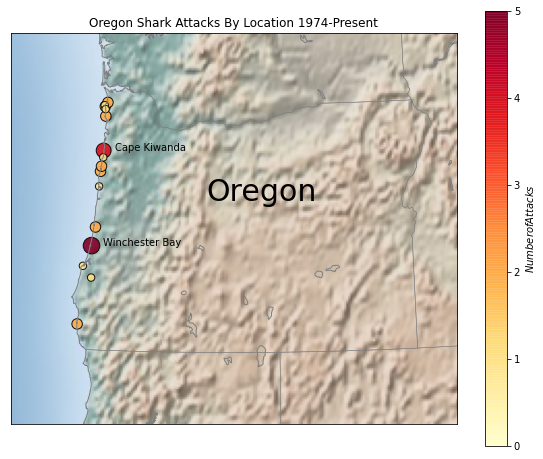

In [1205]:
# 1. Draw the map background
fig = plt.figure(figsize=(10,8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=44, lon_0=-121,
            width=.8E6, height=.7E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. Plot our data, with color and size showing number of attacks at each location
m.scatter(location_lon, location_lat, latlon=True, c=number_of_attacks, edgecolors='black', s=number_of_attacks*55, cmap='YlOrRd', alpha = 0.9)

# 3. create colorbar and legend
plt.colorbar(label=r'$Number of Attacks$')
plt.clim(0,5)

# 4. Labels for two deadliest spots
wb_x, wb_y = m(attacks_by_location.loc[82, 'Longitude'], attacks_by_location.loc[82, 'Latitude'])
ck_x, ck_y = m(attacks_by_location.loc[9, 'Longitude'], attacks_by_location.loc[9, 'Latitude'])
plt.text(wb_x+20000,wb_y+500,'Winchester Bay')
plt.text(ck_x+20000,ck_y+500,'Cape Kiwanda')

# 5. Plot Titles
plt.title('Oregon Shark Attacks By Location 1974-Present')
plt.text(.35E6, .40E6,"Oregon", size=30, c='black')

## Interpretation 

We can see that there are specific regions where shark attacks tend to occur. There is a pocket up North Near Cannon beach, one Near Cape Kiwanda, and near Winchester Bay. 

Sharks tend to congregate near river mouths and Jetties, as this where much of the coastal foodchain interacts. Fish travel from rivers, which attacts seals looking for food. The seals are what ultimately attracts sharks to these regions. Unfortunately for surfers, rivermouths and jetties tend to offer good surf as sand and silt deposited from rivers creates sandbars. These sandbars builds up into sandbars, which help to create ideal waves for surfing. 

Looking at a more detailed map, we can notice that both Cape Kiwanda and Winchester Bay are located at the mouth of major rivers, which is likely the main cause for their spike in shark activity.

# Other Shark Attack Factors

In this next section, we will focus on:
- Time of year attacks take place
- Time of day attacks take place

# 2. Which times of day are attacks more likely to occur?

Text(0.5, 1.0, 'Time of Attacks')

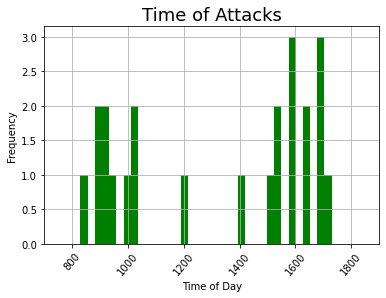

In [1229]:
time_of_attack = oregon_attacks['Time']

# Delete Missing / Incomplete values
time_of_attack = time_of_attack.dropna()
time_of_attack = time_of_attack.drop(137)
time_of_attack = time_of_attack.drop(242)

# Reformat
time_reformat = time_of_attack.str.split('h', expand = True)
time_of_attack = time_reformat[0] + time_reformat[1]
time_of_attack = time_of_attack.sort_values()
time_of_attack = time_of_attack.astype(int)


freq_of_attacks = time_of_attack.value_counts()
freq_of_attacks = pd.DataFrame(freq_of_attacks)
#freq_of_attacks

time_of_attack.hist(bins=35, xrot=50, color='green')
plt.xlim([700, 1900])
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.title('Time of Attacks', fontsize = 18)

## Interpretation

We can see that the attacks cluster in the morning between 8am and 10am and the evening between 3 and 5pm. 

This is likely because sharks tend to feed in the morning and evening. Thus, we can infer that more attacks will occur during feeding times. That is not to say that sharks are hunting for humans, but rather they are more likely to mistake surfers for a seal or related sea creature.

# 3. Which seasons of year are attacks more likely to occur?

### Next, we want to see what time of Year these attacks are most likely to occur

In [1207]:
# extract dates of attacks from dataframe
date_of_attack = oregon_attacks['Date']

# convert data into usable form
day_month_year = date_of_attack.str.split('-', expand = True)
day_month_year = day_month_year.rename(columns = {0:'Day', 1:"Month", 2:"Year"})

# show number of attacks per month
print(day_month_year['Month'].value_counts())

Sep    7
Oct    7
Aug    3
Nov    3
Dec    2
Jan    2
Mar    2
Jul    1
Apr    1
Feb    1
Name: Month, dtype: int64


In [1208]:
# Create DataFrame of Standard Months
def_months = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
def_months = pd.DataFrame(def_months)
def_months = def_months.rename(columns={0:'Month'})

# create Dataframe showing attacks per month
months = day_month_year['Month'].value_counts()
months = pd.DataFrame(months)
months = months.rename(columns={'Month':'Number Attacks'})
# align index 
months.insert(0,'index',[0,1,11,2,3,4,6,10,7,5])
months = months.set_index('index')

# join dataframes together
attacks_per_month = def_months.join(months)
attacks_per_month = attacks_per_month.fillna(0)
attacks_per_month

,Month,Number Attacks
0,Sep,7.0
1,Oct,7.0
2,Nov,3.0
3,Dec,2.0
4,Jan,2.0
5,Feb,1.0
6,Mar,2.0
7,Apr,1.0
8,May,0.0
9,Jun,0.0


Text(0.5, 1.0, 'Number of Attacks by Month')

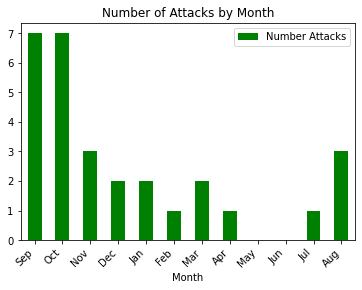

In [1209]:
# Plot figure

ax = attacks_per_month.plot.bar(x='Month', y='Number Attacks', color='green')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Attacks by Month')

## Interpretation

We can see that most of the attacks occur in the Fall Months between August and November. This is likely because Salmon migrate from rivers to the ocean in the Fall, and attract hungry seals to rivermouths. This in turn, attracts sharks who enjoy feeding on the seals that are fattening up for the Winter Months.

# (Not so) Fun Fact from data exploration
Amazingly, there has been one surfer who has been attacked twice on the Oregon Coast! His Name is Seth Mead and he was attacked in 2004 and 2010. What luck! The details are provided below.

In [1210]:
# Odd Facts in Data
oregon_attacks['Name'].value_counts()
oregon_attacks[oregon_attacks['Name'] == 'Seth Mead']

,Case Number,Date,Year,Type,Country,Area,Location,Latitude,Longitude,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
80,2010.10.28,28-Oct-2010,2010,Unprovoked,USA,Oregon,Florence,43.980009,-124.101309,Surfing,Seth Mead,M,32,No injury to surfer,N,15h20,NaN,R. Collier
129,2004.09.20,20-Sep-2004,2004,Unprovoked,USA,Oregon,Gold Beach,42.407446,-124.421742,Surfing,Seth Mead,M,26,Leg bitten,N,09h00,White shark,"S. Mead, R. Collier, J. Eager, B. Middleton"


# Conclusion

Though there have only been 29 Shark attacks in the state of Oregon since 1974, the area is still considered to have a higher shark threat than many other regions on the West Coast. Sharks breed in warmer waters in Southern California and Mexico, but come up north to feed on Seals and Sea Lions.

It is thought that sharks are generally not interested in attacking humans, and most unprovoked attacks seem to be misidenfication of seals. However, since sharks are capable of tremendous harm, it is important to know the risks that are taken when in the water.

### Based on this data, the greatest way to mitigate risk is to excercise caution when surfing :
- near river mouths and jetties
- during Fall Months
- around dawn and dusk (when sharks feed)

It is also wise to always surf with a friend to minimize risk of other dangers that may occur in the water (hold downs, rip tides, injuries)


Hope you enjoyed the project!

# Further Reading

New advancements in drone technology have driven research efforts to study shark behavior in the surf zone, particularly in Florida. Drone footage has been able to better capture shark behavior from an aerial perspective, which can then be analyzed.  Researches noted the surprising number of sharks that they observed via the drone footage, swimming around and underneath surfers at times. However, the sharks tended to ignore the surfers for the most part, minding their own business. This is both reassuring and unsettling. (for full article visit: https://www.registerguard.com/story/news/2020/08/11/drones-reveal-shark-fests-though-oregon-bites-remain-rare/113043486/)